# Too Much Commitment 

### For this project, We'll see how worse my mental health will be once I land a job in this lovely industry.

# Not So Interesting EDA

In [1]:

import seaborn as sns
import numpy as np
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import sklearn
import pandas as pd
import researchpy as rp
import scipy.stats as stats


DB_PATH = "/Users/mimi/Desktop/PYTHON/TURING/HOME/M2/data/mental_health.sqlite"
conn = sqlite3.connect(DB_PATH)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


tech = pd.read_sql(
    """SELECT *
    FROM Answer 
    WHERE UserID IN (SELECT UserID FROM Answer WHERE QuestionID IS 68 AND AnswerText IS 1)""",
        conn)

stigma_df =  pd.read_sql(
    """ SELECT *
        FROM Answer
        WHERE QuestionID IN ("12", "14", "15", "16", "17")
        AND AnswerText IS NOT "-1" """,
        conn)
productivity_df = pd.read_sql(
    """ 
    SELECT *
    FROM Answer
    WHERE QuestionID IS 55 """,
    conn)






In [4]:
df = pd.read_sql(
    """ 
    SELECT *
    FROM Answer 
    ;""",
    conn)
df_questions = pd.read_sql(
    """ 
    SELECT *
    FROM Question 
    ;""",
    conn)
df_survey = pd.read_sql(
    """ 
    SELECT *
    FROM Survey 
    ;""",
    conn)



In [5]:
df_survey.SurveyID.value_counts().to_frame()

,SurveyID
2014,1
2016,1
2017,1
2018,1
2019,1


In [6]:
df_questions.head()

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5


In [7]:
df_questions.shape

(105, 2)

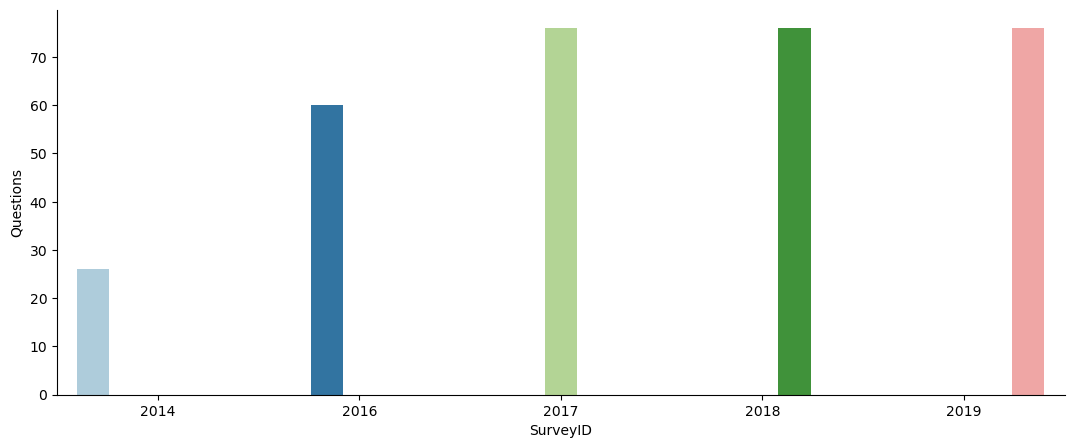

In [8]:
surveyid = pd.read_sql(
    """
    SELECT COUNT(DISTINCT(QuestionID)) as Questions, SurveyID, COUNT(DISTINCT(UserID)) as Users
    FROM Answer
    GROUP BY SurveyID""", conn)

surveyid

plt.figure(figsize=(13,5))
g = sns.barplot(hue="SurveyID",y="Questions", x="SurveyID", data=surveyid, palette="Paired" )
g.legend_.remove()
sns.despine()



plt.show()


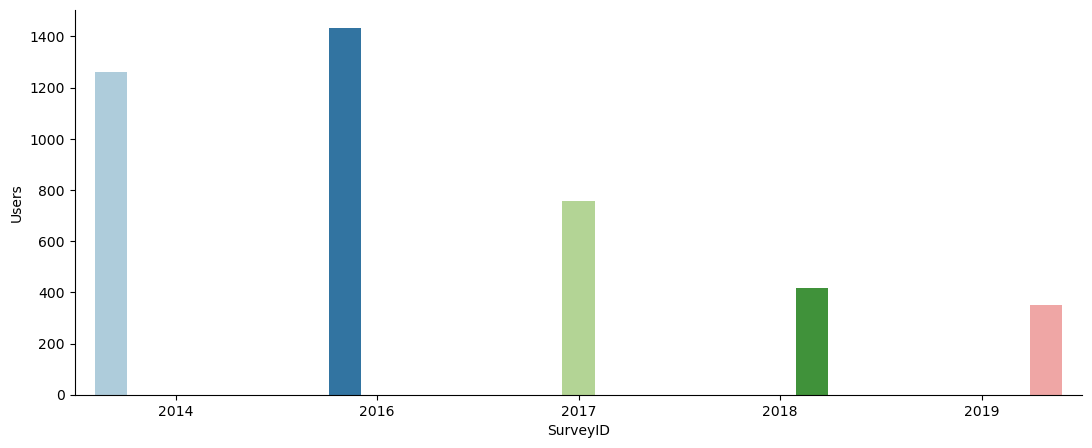

In [9]:
plt.figure(figsize=(13,5))
g = sns.barplot(hue="SurveyID",y="Users", x="SurveyID", data=surveyid, palette="Paired" )
g.legend_.remove()
sns.despine()



plt.show()


# More Interesing EDA

<br />Question #54 states:<br />
<br />
Do you believe your productivity is ever affected by a mental health issue?</p>


<br />Question #55 states:
<br />


If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?

In [42]:
questions = pd.read_sql(
    """ 
    SELECT *
        FROM Answer
        WHERE QuestionID IN ("12", "14", "15", "16", "17", "55")
        AND AnswerText IS NOT "-1" """,conn)

questions[questions['QuestionID'] == 55]['AnswerText'].value_counts().to_frame()

,AnswerText
1-25%,164
26-50%,125
51-75%,53
76-100%,25


Questions 12, 14 15, 16 and 17 state:

--12 Would you bring up a mental health issue with a potential employer in an interview?

-- 14 Do you know the options for mental health care available under your employer-provided health coverage?

--15 Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?

--16 Does your employer offer resources to learn more about mental health disorders and options for seeking help?

--17 If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?



# (SQUAD) GOALS

### Formulating Null_Hypothesis

Using these questions and a $\tilde{\chi}^2$ test, I form the following:

In [31]:
Null_Hypothesis = ["Mental health stigma has no impact on overall mental health in the workforce?"]

What does this means you say? Easy. I want to know if a positive mental health corporate culture translate into higher employee mental health. 
How will reject or fail to reject the NH?
Do the following features correlate into better or worse employee mental health:

* How to avoid a mental health emergency? (ease of accesing help or preventive measures)



* How are mental health issues perceived in the company (how openly mental health is discussed amongst employees, supervisors and in interview process)


* Overall employee productivity / satisfaction

We fail to reject the null hypothesis if theres correlation with these features and overall productivity and mental health in the workforce. 

In [52]:
tech_work = pd.read_sql(
    """ 
    SELECT *
    FROM Answer 
    WHERE UserID IN (SELECT UserID FROM Answer WHERE QuestionID IS 68 AND AnswerText IS 1);""",
    conn)

questions_df = tech_work[tech_work['QuestionID'].isin([12, 14, 15, 16, 17])]

tech_work.head()

,AnswerText,SurveyID,UserID,QuestionID
0,31,2017,2695,1
1,36,2017,2696,1
2,30,2017,2699,1
3,36,2017,2700,1
4,38,2017,2701,1


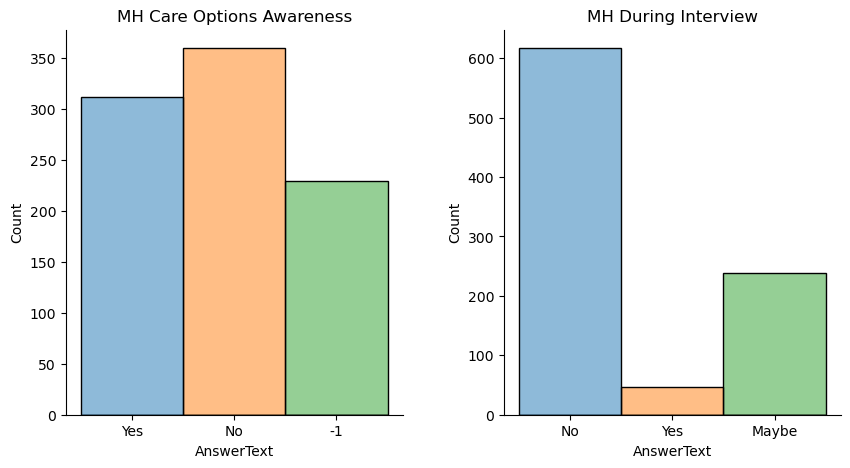

In [50]:
q12 = pd.read_sql(
    """ 
    SELECT *
    FROM Answer 
    WHERE UserID IN (SELECT UserID FROM Answer WHERE QuestionID IS 68 AND AnswerText IS 1)
    AND QuestionID is 12;""",
    conn)


q12 = q12['AnswerText'].to_frame()


q14 = pd.read_sql(
    """ 
    SELECT *
    FROM Answer 
    WHERE UserID IN (SELECT UserID FROM Answer WHERE QuestionID IS 68 AND AnswerText IS 1)
    AND QuestionID is 14;""",
    conn)


q14 = q14['AnswerText'].to_frame()




fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.3)

sns.histplot(ax=ax[0],
             hue=q14['AnswerText'],
             data=q14,
             legend=False,
            x=q14['AnswerText']
            )
ax[0].set_title('MH Care Options Awareness')
sns.despine()

sns.histplot(ax=ax[1],
    hue=q12['AnswerText'],
             data=q12,
             legend=False,
            x=q12['AnswerText']
            )

ax[1].set_title('MH During Interview')
sns.despine()
plt.show()

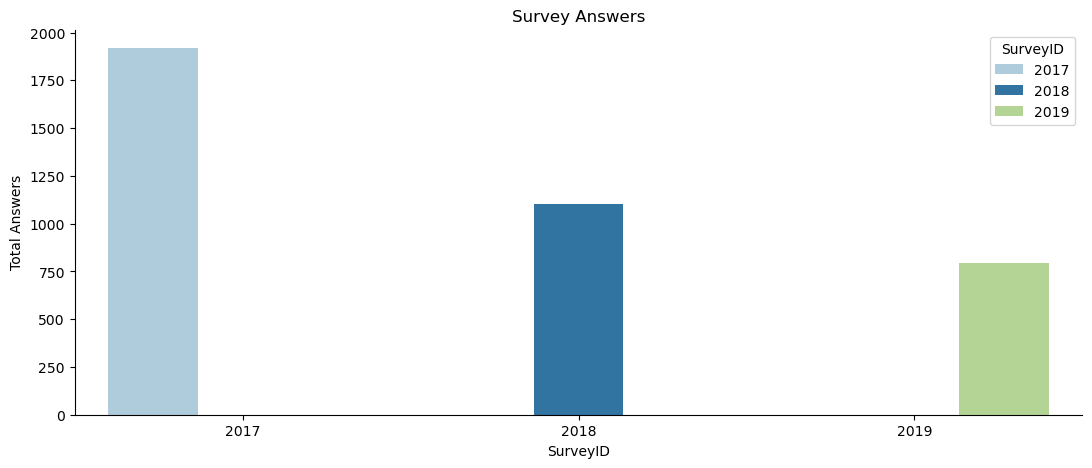

In [33]:
survey_df_graph = stigma_df.groupby("SurveyID").count().reset_index()
plt.figure(figsize=(13,5))
sns.barplot(hue = "SurveyID", y="AnswerText", x="SurveyID" ,data=survey_df_graph, palette="Paired").set(ylabel = "Total Answers",title='Survey Answers')
plt.ticklabel_format(style='plain', axis='y')
sns.despine()
plt.show()

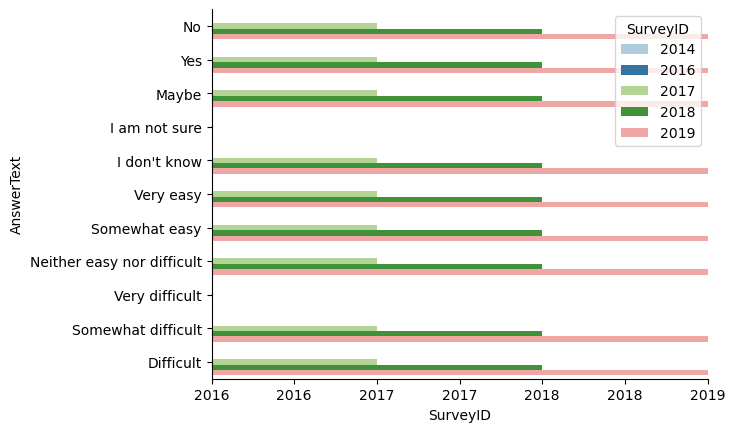

In [44]:
fig, ax = plt.subplots()
sns.barplot(hue = "SurveyID", y="AnswerText", x="SurveyID" ,data=stigma_df[['AnswerText','SurveyID']], palette="Paired")
ax.set_xlim(2016, 2019)
sns.despine()
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.show()

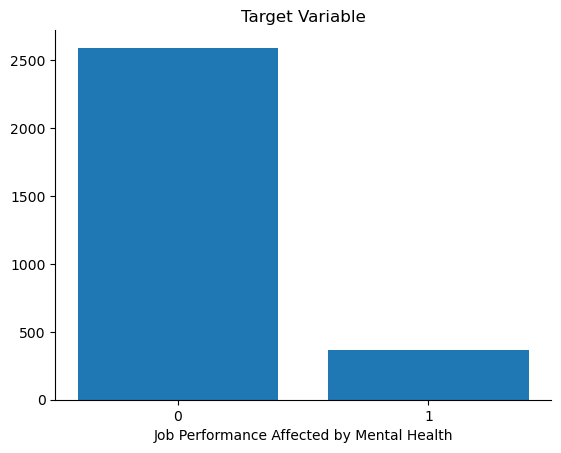

In [49]:



productivity_df['AnswerText'] = productivity_df['AnswerText'].apply(lambda x: "0" if x == "-1" else '1')
df = pd.concat([stigma_df, productivity_df], axis=0)




fig, ax = plt.subplots()

ax.bar(
        list(productivity_df[productivity_df['QuestionID'] == 55]['AnswerText'].value_counts().index),
        list(productivity_df[productivity_df['QuestionID'] == 55]['AnswerText'].value_counts().values),
       
       linewidth=2.0)
plt.title("Target Variable")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('Job Performance Affected by Mental Health')

plt.show()


In [4]:
cross = pd.crosstab(df[df["QuestionID"] == 55]["AnswerText"], df[df["QuestionID"] != 55]["AnswerText"])
res = stats.chi2_contingency(cross)
res.pvalue

In [10]:
crosstab, test_results, expected = rp.crosstab(df[df["QuestionID"] == 55]["AnswerText"], df[df["QuestionID"] != 55]["AnswerText"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

AnswerText                             
AnswerText I don't know  Maybe     No    Yes     All
AnswerText                                          
0                  1.00  11.43  54.83  19.53   86.79
1                  0.22   1.44   7.99   3.55   13.21
All                1.22  12.87  62.82  23.09  100.00

In [11]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,1.6194
1,p-value =,0.6550
2,Cramer's V =,0.0424


### Conclusion

the p-value is larger than the significance level, one fails to reject the null hypothesis because there is not enough evidence to conclude that the variables are associated.

# Further Consideration

To build upon this first finding, I would use other questions (besides #55) gauge if there is statistical significance between corporate culture, mental health, and productivity. Additionally, this test does not use the ordinal nature of question #55. There are some other libraries that claim to be able to consider ordinal features amongst nominal variables. 

Another method is also available, a Decision Tree could be tested to see if theres any correlation between these features.

### Sources

https://www.kaggle.com/code/hamelg/python-for-data-25-chi-squared-tests

https://stattrek.com/chi-square-test/independence?utm_content=cmp-true#google_vignette

https://pythonfordatascienceorg.wordpress.com/chi-square-python/